# Logistic Regression

`Problem` - Find whether a user or a customer will purchase a car or not\
`Dataset` - This dataset contains the information of various users obtained from the social networking sites. Contains features like Gender and Salary

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

plt.style.use('dark_background')

In [ ]:
url

In [2]:
suv_df = pd.read_csv(url)

In [3]:
suv_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:>

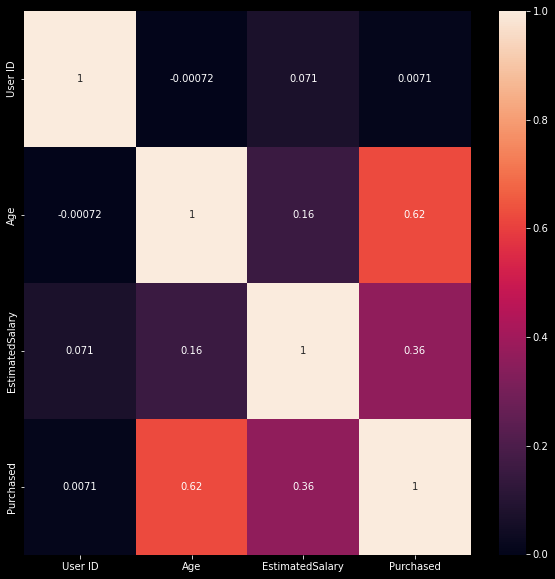

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(suv_df.corr(), annot=True)

In [5]:
suv_df.shape

(400, 5)

In [6]:
suv_df.isnull().sum() 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# storing the target column as an array
# dropping the column USER ID because it is useless in predicting the output
Y = np.array(suv_df['Purchased'])
X = suv_df.drop(suv_df.columns[[0, -1]], axis=1)

In [8]:
# Convert the categorical column Gender to numerical -- It adds two new column
X = pd.get_dummies(X, columns=['Gender'])
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [9]:
# scaling the input data between appropriate values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# splitting the input and target columns into test and train , 20% for test and 80% for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [11]:
# using optimizer 'liblinear', train the Logistic Regression model
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [12]:
Yhat = lr.predict(X_test)
accuracy_score(Y_test, Yhat)  # predicted with an accuracy of 0.825 

0.825

In [16]:
confusion_matrix(Y_test, Yhat)

array([[46,  2],
       [12, 20]], dtype=int64)

In [13]:
# checking the probability of prediction with respect to each class
Yhat_prob = lr.predict_proba(X_test)
Yhat_prob[:10] 

array([[0.64012233, 0.35987767],
       [0.82377336, 0.17622664],
       [0.61777328, 0.38222672],
       [0.66504003, 0.33495997],
       [0.37711623, 0.62288377],
       [0.56707917, 0.43292083],
       [0.70676591, 0.29323409],
       [0.75072522, 0.24927478],
       [0.55751118, 0.44248882],
       [0.46604217, 0.53395783]])

# Ordinary Least Square Regresssion

`Problem` - Find house prices based on various features such as no. of bedrooms, bathrooms \
`Dataset` - Dataset is taken from statsmodel api , contains features like bathroom, bedrooms, garage, stories

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
# dataset is contained in 'AER' package in statsmodle api
houseprice_data = sm.datasets.get_rdataset(dataname='HousePrices',package='AER', cache=True).data
hp_df = pd.DataFrame(houseprice_data)
hp_df.head(10)

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
5,66000.0,4160,3,1,1,yes,yes,yes,no,yes,0,no
6,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
7,69000.0,4160,3,1,3,yes,no,no,no,no,0,no
8,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
9,88500.0,5500,3,2,4,yes,yes,no,no,yes,1,no


<AxesSubplot:>

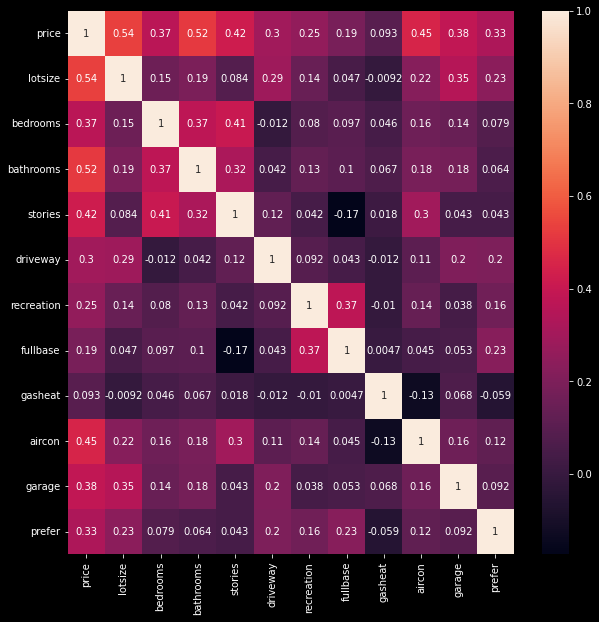

In [300]:
plt.figure(figsize=(10,10))
sns.heatmap(hp_df.corr(), annot=True)

In [201]:
# replace yes with 1 and no with 0 in the whole dataset
hp_df.replace(['yes', 'no'], [1, 0], inplace=True)

In [242]:
hp_df.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [210]:
# take the appropriate target and input variables
Y = hp_df['price']
X = hp_df.iloc[ : , 1 : ]

In [216]:
X = sm.add_constant(X) # ols needs a constant along with the input variables

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [243]:
X.head()

,const,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1.0,5850,3,1,2,1,0,1,0,0,1,0
1,1.0,4000,2,1,1,1,0,0,0,0,0,0
2,1.0,3060,3,1,1,1,0,0,0,0,0,0
3,1.0,6650,3,1,2,1,1,0,0,0,0,0
4,1.0,6360,2,1,1,1,0,0,0,0,0,0


In [217]:
ols = sm.OLS(Y,X).fit()
ols.summary() # full summary of the ols model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          6.18e-122
Time:                        13:41:22   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.237   -1.07e+04    2659.271
lotsize        3.5463      0.350     10.124      0.000       2.858       4.234
bedrooms    1832.0035   1047.000      1.750      0.081    -224.741    3888.748
bathrooms   1.434e+04   1489.921      9.622      0.000    1.14e+04    1.73e+04
stories     6556.9457    925.290      7.086      0.000    4739.291    8374.600
driveway    6687.7789   2045.246      3.270      0.001    2670.065    1.07e+04
recreation  4511.2838   1899.958      2.374      0.018     778.976    8243.592
fullbase    5452.3855   1588.024      3.433      0.001    2332.845    8571.926
gasheat     1.283e+04   3217.597      3.988      0.000    6510.706    1.92e+04
aircon      1.263e+04   1555.021      8.124      0.000    9578.182    1.57e+04
garage      4244.8290    840.544      5.050      0.000    2593.650    5896.008
prefer      9369.5132   1669.091      5.614      0.000    6090.724    1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
ols.params # prints the coefficient of the corresponding input variables

const         -4038.350425
lotsize           3.546303
bedrooms       1832.003466
bathrooms     14335.558468
stories        6556.945711
driveway       6687.778890
recreation     4511.283826
fullbase       5452.385539
gasheat       12831.406266
aircon        12632.890405
garage         4244.829004
prefer         9369.513239
dtype: float64

# Two Stage Least Square Regression
The problem and dataset is same as `OLS` regression but will do things differently here

In [255]:
import linearmodels.iv.model as lm

In [256]:
X.head()

,const,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1.0,5850,3,1,2,1,0,1,0,0,1,0
1,1.0,4000,2,1,1,1,0,0,0,0,0,0
2,1.0,3060,3,1,1,1,0,0,0,0,0,0
3,1.0,6650,3,1,2,1,1,0,0,0,0,0
4,1.0,6360,2,1,1,1,0,0,0,0,0,0


In [291]:
cols = X.columns.to_list()
cols.remove('lotsize')
cols.remove('garage')
cols.remove('driveway')
cols

['const',
 'bedrooms',
 'bathrooms',
 'stories',
 'recreation',
 'fullbase',
 'gasheat',
 'aircon',
 'prefer']

In [292]:
#store the endog, exog and instrument variables separately

exog_v = X[cols]
endog_v = X['lotsize']
intstrument_v = X[['driveway', 'garage']]

In [294]:
# used covariance type as homoskedastic which signifies that the error term is constant

sls2 = lm.IV2SLS(dependent=Y, exog=exog_v, endog=endog_v, instruments=instrument_v).fit(cov_type="homoskedastic", debiased=True)

In [295]:
sls2.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  price   R-squared:                      0.4822
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4735
No. Observations:                 546   F-statistic:                    70.194
Date:                Mon, Mar 06 2023   P-value (F-stat)                0.0000
Time:                        14:16:15   Distribution:                 F(9,536)
Cov. Estimator:         homoskedastic                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -1.966e+04     5345.2    -3.6774     0.0003  -3.016e+04     -9156.4
bedrooms       405.23     1330.7     0.3045     0.7608     -2208.8      3019.3
bathrooms   1.174e+04     1961.6     5.9860     0.0000      7888.7    1.56e+04
stories        7691.5     1164.0     6.6079     0.0000      5405.0      9978.1
recreation     1525.9     2444.9     0.6241     0.5328     -3276.7      6328.6
fullbase       7628.9     2027.1     3.7634     0.0002      3646.8   1.161e+04
gasheat     1.334e+04     4032.5     3.3073     0.0010      5415.0   2.126e+04
aircon         9041.5     2124.5     4.2559     0.0000      4868.2   1.321e+04
prefer         4475.9     2357.7     1.8984     0.0582     -155.56      9107.3
lotsize        9.7298     1.1325     8.5917     0.0000      7.5052      11.954
==============================================================================

Endogenous: lotsize
Instruments: driveway.yes, garage
Unadjusted Covariance (Homoskedastic)
Debiased: True
"""